<img src="https://ri.lasa.com.br/img/2020/logo.png" width="600">

# reviews de produtos da loja Americas

Ele contém mais de 130 mil avaliações de clientes de comércio eletrônico, coletadas no site da Americanas.com entre janeiro e maio de 2018.

## Grupo

Alan Pereira, Diego Oliveira

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import re
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
set(stopwords.words('portuguese'))
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize, pos_tag, pos_tag_sents, tokenize
nltk.download('averaged_perceptron_tagger')
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import RSLPStemmer
nltk.download('rslp')
import unicodedata

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [2]:
url = 'https://raw.githubusercontent.com/alanexplorer/NLP-b2w-reviews01/master/B2W-Reviews01.csv'
df = pd.read_csv(url, sep=';')

C:\Users\conta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Tamanho do dataset

In [3]:
def sizeDataset():
    row_size = df.shape[0]
    col_size = len(df.columns)
    print(row_size, col_size)

In [4]:
print('tamanho do dataset')

sizeDataset()

tamanho do dataset
132373 14


In [5]:
print('novo tamanho do dataset')

sizeDataset()

novo tamanho do dataset
132373 14


# Pegar as colunas de interesse

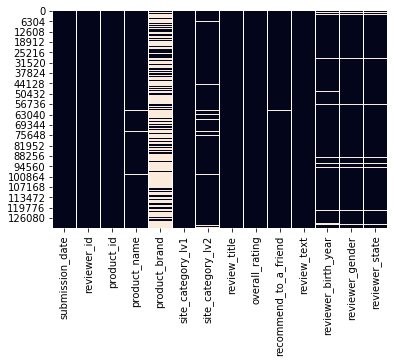

In [6]:
# visualização dos dados faltando
sns.heatmap(df.isnull(), cbar=False)

In [7]:
# pegar os labels de interesses
labels = []
my_labels=['review_text','recommend_to_a_friend']
for i in list(df.columns):
    if(not i in my_labels):
        labels.append(i)
        
df.drop(columns=labels, inplace=True)

In [8]:
# nomes das colunas com informações faltando
col_nan = []
for i in list(df.columns):
    isNaN = df[i].isnull().values.any()
    if isNaN:
        col_nan.append(i)
        
print(col_nan)

['recommend_to_a_friend']


In [9]:
# Detela as linhas com informações faltando

df.dropna(subset = col_nan, inplace=True)

# reinicia a contagem das linhas
df.reset_index(drop=True, inplace=True)

In [10]:
# verifica se todas as colunas estão completas
df.isnull().values.any()

False

# Ajustar tipos das colunas

In [11]:
df.dtypes

recommend_to_a_friend    object
review_text              object
dtype: object

In [12]:
df.loc[df['recommend_to_a_friend'] == 'Yes', 'recommend_to_a_friend'] = True
df.loc[df['recommend_to_a_friend'] == 'No', 'recommend_to_a_friend'] = False

In [13]:
df['recommend_to_a_friend'] = df['recommend_to_a_friend'].astype(np.bool_)

In [14]:
df.dtypes

recommend_to_a_friend      bool
review_text              object
dtype: object

In [15]:
df.head()

,recommend_to_a_friend,review_text
0,True,Estou contente com a compra entrega rápida o ú...
1,True,"Por apenas R$1994.20,eu consegui comprar esse ..."
2,True,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3,True,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4,True,"A entrega foi no prazo, as americanas estão de..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132355 entries, 0 to 132354
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   recommend_to_a_friend  132355 non-null  bool  
 1   review_text            132355 non-null  object
dtypes: bool(1), object(1)
memory usage: 1.1+ MB


# Analisar os dados

In [17]:
df["recommend_to_a_friend"].value_counts()

True     96368
False    35987
Name: recommend_to_a_friend, dtype: int64

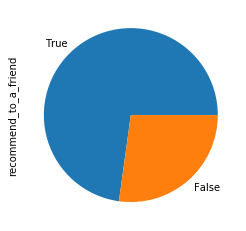

In [18]:
df["recommend_to_a_friend"].value_counts().plot.pie();

# Exercício

## 1.   Determine a distribuição de comprimentos dos textos (em quantidade de caracteres), listando estas quantidades e plotando um histograma.



<Figure size 864x720 with 0 Axes>

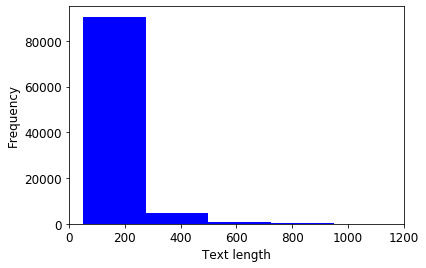

<Figure size 864x720 with 0 Axes>

In [19]:
text_lenth = df.loc[df['recommend_to_a_friend'] == True]['review_text'].str.len()

text_lenth.hist(bins=20, grid=False, xlabelsize=12, ylabelsize=12, color="b")
plt.xlabel("Text length", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.xlim([0,1200])
plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

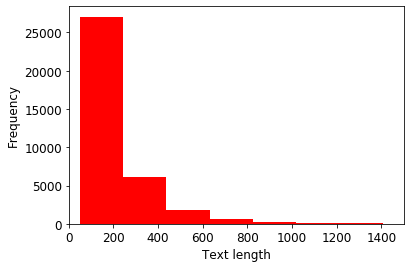

<Figure size 864x720 with 0 Axes>

In [20]:
text_lenth = df.loc[df['recommend_to_a_friend'] == False]['review_text'].str.len()

text_lenth.hist(bins=20, grid=False, xlabelsize=12, ylabelsize=12, color="red")
plt.xlabel("Text length", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.xlim([0,1500])
plt.figure(figsize=(12,10))

## 2.   Aplique os seguintes passos de pré-processamento aos textos:

*   Remova todas as palavras que contêm números;
*   Converta as palavras para minúsculas;
*   Remova pontuação;
*   Tokenize os textos em palavras, gerando um dicionário único com n tokens e convertendo cada texto em um vetor de dimensão n com a respectiva contagem de palavras.


In [21]:
# remover palavras que contêm números

df['review_text'] = df['review_text'].replace(to_replace ='\w*\d\w*', value = '', regex = True) 
df['review_text'].head()

0    Estou contente com a compra entrega rápida o ú...
1    Por apenas R$.,eu consegui comprar esse lindo ...
2    SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3    MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4    A entrega foi no prazo, as americanas estão de...
Name: review_text, dtype: object

In [22]:
# converter texto para minúsculo

df['review_text'] = df['review_text'].str.lower()
df['review_text'].head()

0    estou contente com a compra entrega rápida o ú...
1    por apenas r$.,eu consegui comprar esse lindo ...
2    supera em agilidade e praticidade outras panel...
3    meu filho amou! parece de verdade com tantos d...
4    a entrega foi no prazo, as americanas estão de...
Name: review_text, dtype: object

In [23]:
# Remove Pontuação

df['review_text'] = df['review_text'].replace(to_replace ='[%s]' % re.escape(string.punctuation), value = '', regex = True) 
df['review_text'].head()

0    estou contente com a compra entrega rápida o ú...
1    por apenas reu consegui comprar esse lindo cop...
2    supera em agilidade e praticidade outras panel...
3    meu filho amou parece de verdade com tantos de...
4    a entrega foi no prazo as americanas estão de ...
Name: review_text, dtype: object

In [25]:
cv = CountVectorizer()
dictionary = cv.fit_transform(df['review_text'])
df_dictionary = pd.DataFrame(dictionary.toarray(), columns=cv.get_feature_names())

In [26]:
len(cv.get_feature_names())

24961

In [27]:
cv.get_feature_names()[1000:1010]

['alongados',
 'alongar',
 'alquimia',
 'alsas',
 'alt',
 'alta',
 'altamente',
 'altas',
 'altasmas',
 'altera']

In [28]:
dictionary

<26473x24961 sparse matrix of type '<class 'numpy.int64'>'
	with 472126 stored elements in Compressed Sparse Row format>

In [29]:
df_dictionary.head(10)

,aa,aaa,aaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaagr,aaaahhh,aaparece,...,únicos,úteis,úteispois,úteissuper,útil,útilembora,útilmas,útilnão,útilrápida,útilsendo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
sum_column = df_dictionary.sum(axis=0)
sum_column.sort_values(ascending=False).head(20)

de           17481
produto      14560
que          12453
não          12285
muito        10399
do            8643
com           7951
para          6787
um            6572
bom           5380
recomendo     4862
entrega       4740
da            4681
no            4588
em            4565
mas           3704
na            3665
uma           3595
bem           3520
mais          3443
dtype: int64

## 3. Aplique os seguintes passos de pre-processamento aos textos processados na questão anterior:
* Remova stopwords;
* Realize rotulação de POS;
* Realize stemização;

Exiba os resultados em alguns textos. Verifique quais são as palavras mais
frequentes e compare com as palavras mais frequentes da questão anterior.

In [31]:
stop_words = stopwords.words('portuguese')

In [32]:
stop_words[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [ ]:
# remover stopwords
# remove os stopword do dataset
df['review_text'] = df['review_text'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

In [ ]:
df['review_text'].head()

0    [contente, compra, entrega, rápida, único, pro...
1    [apenas, reu, consegui, comprar, lindo, copo, ...
2    [supera, agilidade, praticidade, outras, panel...
3    [filho, amou, parece, verdade, tantos, detalhe...
4    [entrega, prazo, americanas, parabéns, smart, ...
Name: review_text, dtype: object

In [ ]:
def tokenize_with_pos(line):
  newline = []
  for word in line:
    newline.append(pos_tag(word_tokenize(word)))
  return newline

In [ ]:
 # cria uma nova coluna
 df['pos'] = df.apply(lambda row : tokenize_with_pos(row['review_text']), axis = 1)

In [ ]:
df['pos'].head()

0    [[(contente, NN)], [(compra, NN)], [(entrega, ...
1    [[(apenas, NNS)], [(reu, NN)], [(consegui, NN)...
2    [[(supera, NN)], [(agilidade, NN)], [(praticid...
3    [[(filho, NN)], [(amou, NN)], [(parece, NN)], ...
4    [[(entrega, NN)], [(prazo, NN)], [(americanas,...
Name: pos, dtype: object

In [ ]:
stemmer = RSLPStemmer()
def tokenize_with_stemming(line):
  newline = []
  for word in line:
    newline.append(stemmer.stem(word))
  return newline

In [ ]:
 df['review_text'] = df.apply(lambda row : tokenize_with_stemming(row['review_text']), axis = 1)

In [24]:
df.head()

,recommend_to_a_friend,review_text
0,True,estou contente com a compra entrega rápida o ú...
1,True,por apenas reu consegui comprar esse lindo cop...
2,True,supera em agilidade e praticidade outras panel...
3,True,meu filho amou parece de verdade com tantos de...
4,True,a entrega foi no prazo as americanas estão de ...


In [25]:
df.isnull().values.any()

False

# Baixar o dicionário

In [26]:
df.to_csv('dataset.csv') #atualizado

In [29]:
#df = pd.read_csv('dataset.csv')
#df = pd.read_csv(io.StringIO(df.to_csv()), index_col=0)
df = pd.read_csv('dataset.csv', index_col=0)

In [30]:
df.isnull().values.any()

True

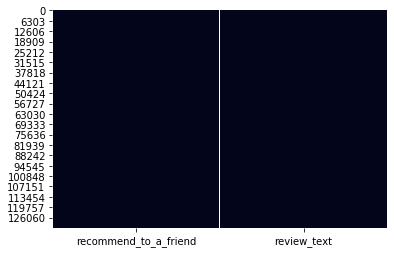

In [35]:
sns.heatmap(df.isnull(), cbar=False)